In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from tensorflow import keras
# model = keras.models.load_model("../data/best-cnn-model.h5")

2023-03-03 15:35:00.431627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 15:35:01.289076: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64
2023-03-03 15:35:01.289128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64
2023-03-03 15:35:01.289133: W tensorflow/compiler/tf2tensorrt/utils/py_uti

In [2]:
from tensorflow import keras
model = keras.models.load_model("./drive/MyDrive/개인 공부/ML_DL/data/best-cnn-model.h5")

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-03-03 15:35:34.574164: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:0 with 220 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5651421618765900352
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 230883328
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17996760205791585161
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
model.layers

In [4]:
conv1 = model.layers[0]
print(conv1.weights[0].shape, conv1.weights[1].shape)
# 3*3*32(필터 개수 32)의 커널과 32의 절편을 출력

(3, 3, 1, 32) (32,)


In [5]:
# conv = model.layers[0]
# print(conv.weights[0].shape, conv.weights[1].shape)
import numpy as np
conv_weights = conv1.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.0077843666 0.2217849


가중치의 분포를 확인

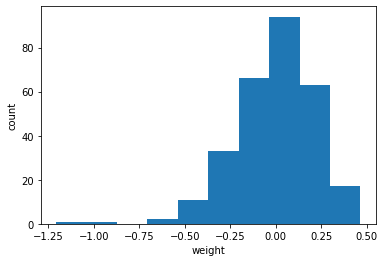

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

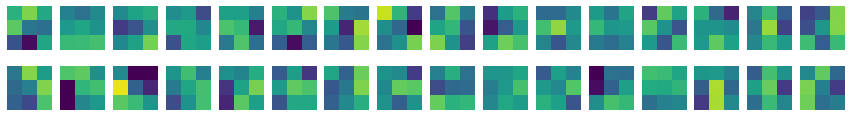

In [7]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [8]:
new_model = keras.Sequential()
new_model.add(keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same",input_shape=(28,28,1)))
new_model_conv = new_model.layers[0]
# 모델에서 첫번째 Conv2D층의 커널 가중치를 new_model_conv에 저장
print(new_model_conv.weights[0].shape)

(3, 3, 1, 32)


모델을 생성하고 처음 텐서플로에서 초기화한 가중치는 균등 분포에서 랜덤하게 값을 선택한다

In [9]:
new_model_weights = new_model_conv.weights[0].numpy()
print(new_model_weights.mean(), new_model_weights.std())

-0.00444456 0.077985935


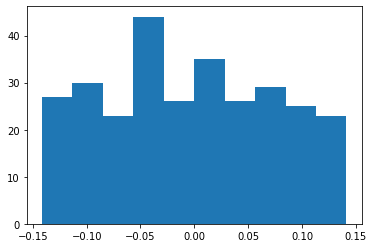

In [10]:
plt.hist(new_model_weights.reshape(-1,1))
plt.show()

색이 훈련 후 모델(best-cnn-model.h5)과 비교하면 고르게 비슷하게 분포되있음

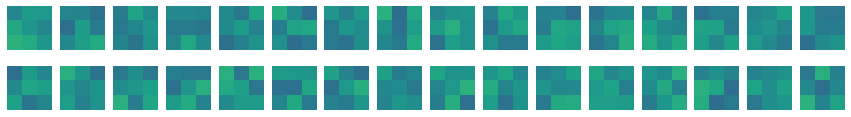

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(new_model_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [12]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [13]:
print(model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [14]:
conv_acti = keras.Model(model.input, model.layers[0].output)

4422102/4422102 [==============================] - 0s 0us/step


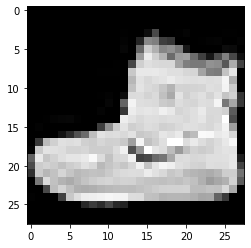

In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap="gray")
plt.show()

In [16]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 7s 7s/step
(1, 28, 28, 32)


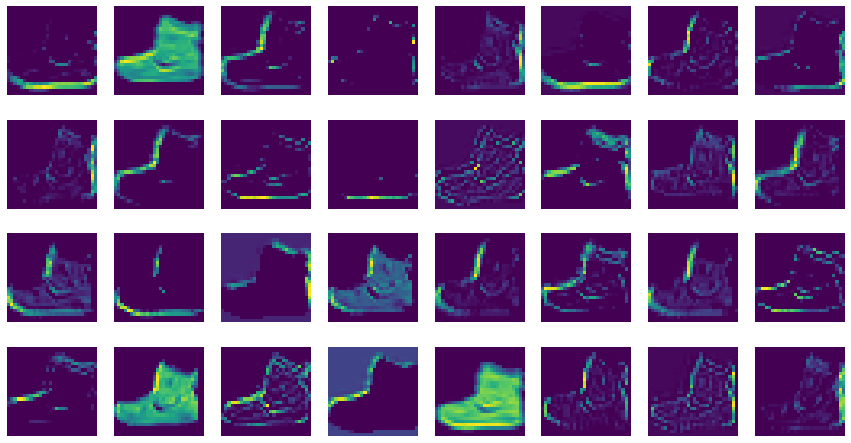

In [19]:
fig,axes = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axes[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axes[i,j].axis("off")
plt.show()

두 번째 합성곱 층에서 나온 특성 맵을 확인

In [20]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)
# 64개의 특성맵이 생성된다

1/1 [==============================] - 0s 121ms/step
(1, 14, 14, 64)


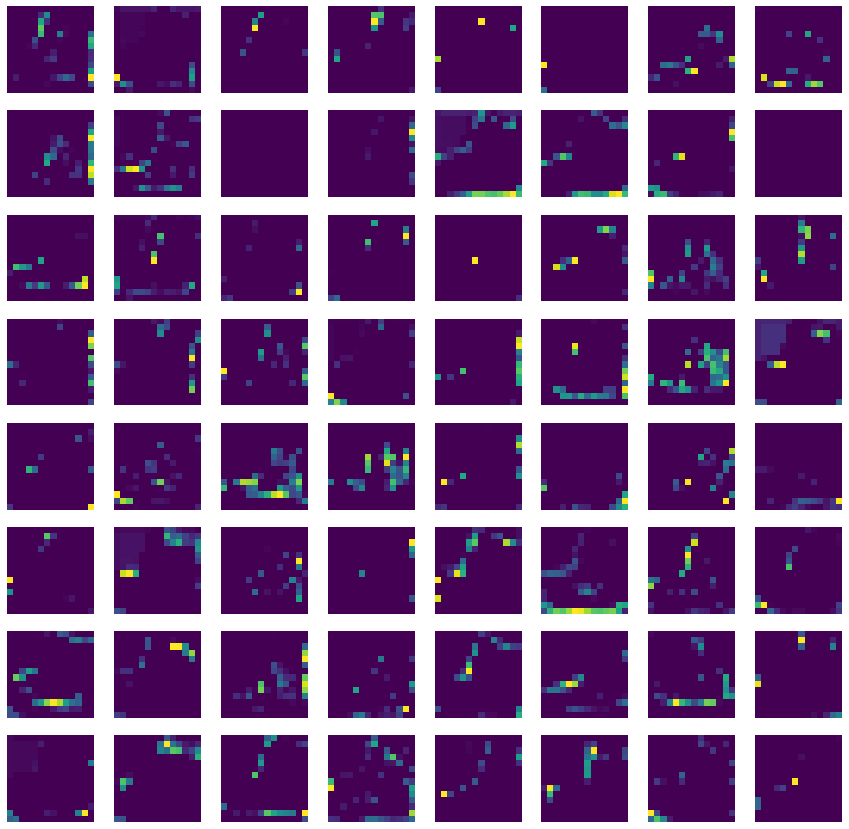

In [21]:
fig,axes = plt.subplots(8,8,figsize=(15,15))
for i in range(8):
  for j in range(8):
    axes[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axes[i,j].axis("off")
plt.show()